In [1]:
import circle_bundles as cb

#For saving
folder_path = '/Users/bradturow/Desktop/Diagrams/Paper Diagrams/'

# Quotients Of The Trivial Bundle Over $\mathbb{S}^{2}$

In [3]:
#Generate a sample from the trivial bundle over S2
from synthetic.s2_bundles import sample_S2_trivial

n_samples = 10000
sigma = 0.05
data, base_points, angles = sample_S2_trivial(
    n_points = n_samples,
    sigma = sigma,
    radius_clip = (0.0, 5.0),
)

### Cover And Nerve Summary
- $n_\text{sets} = 73$, $n_\text{samples} = 10000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 73$
- $\#(\text{1-simplices}) = 216$
- $\#(\text{2-simplices}) = 144$
- *No recorded simplices in dimensions* $\ge 3$

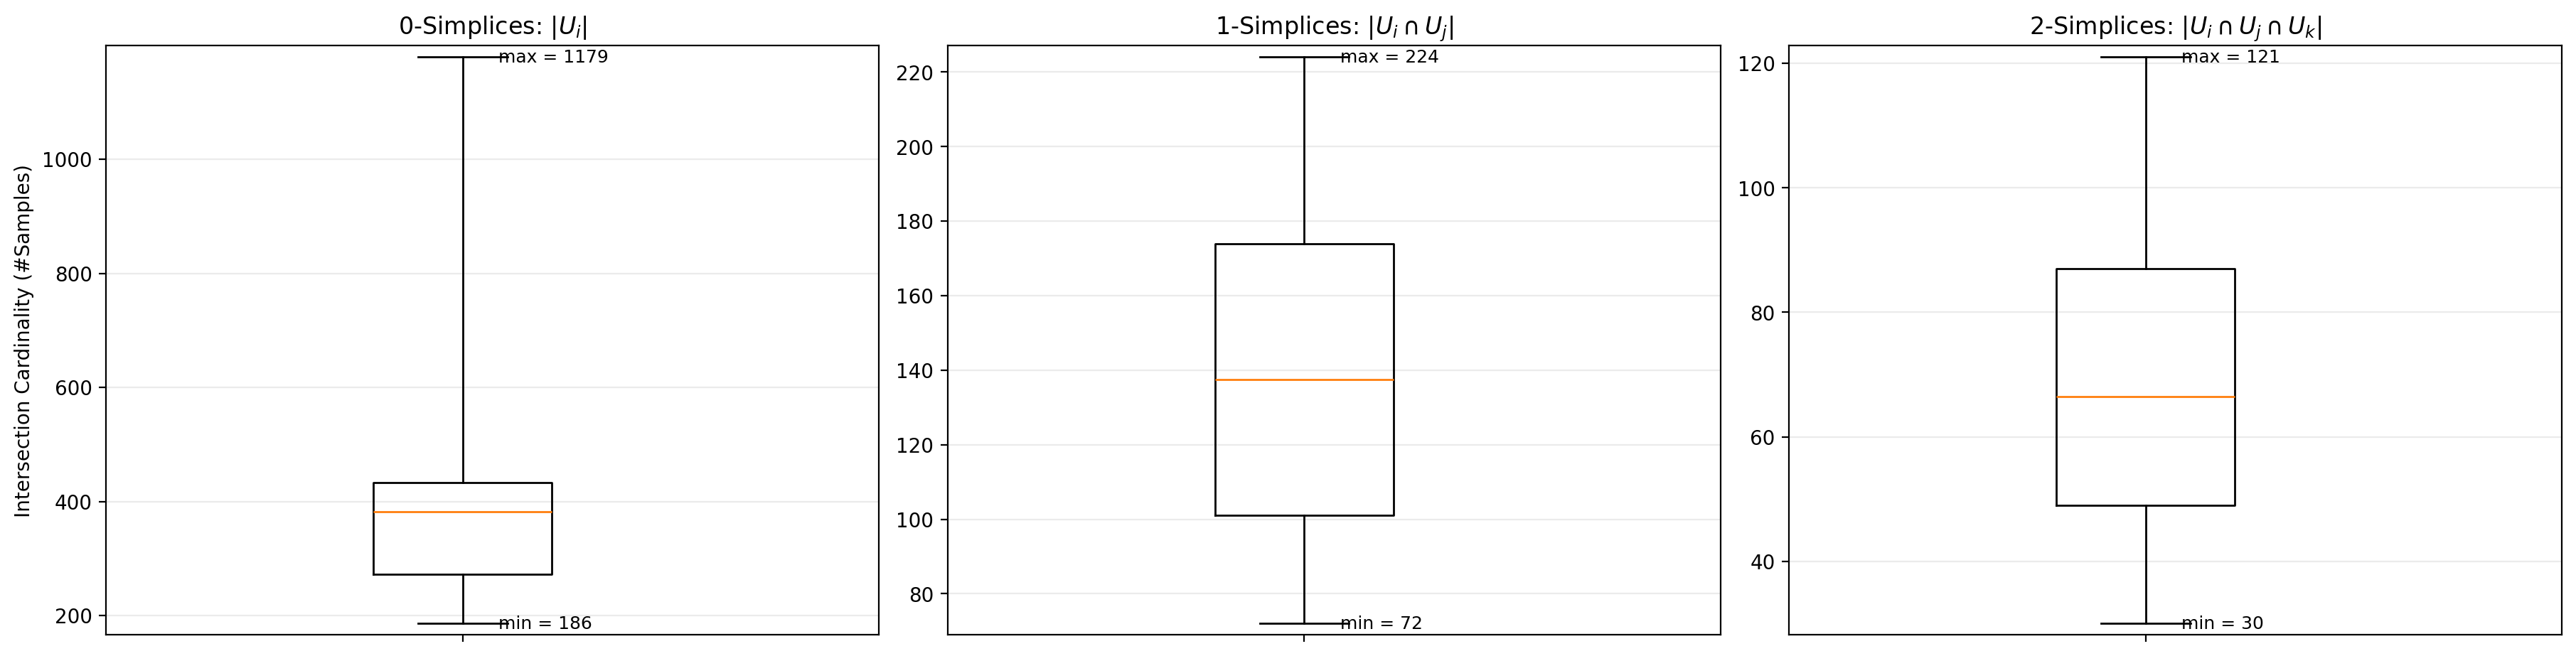

In [4]:
#Map base points to upper half sphere for visualization
base_points[base_points[:,-1] < 0] = -1*base_points[base_points[:,-1] < 0]

#Construct an open cover of RP2
n_sd = 2
cover = cb.make_rp2_cover(base_points, n_sd = n_sd)

summ = cover.summarize(plot = True)

In [5]:
#Compute local trivializations and characteristic classes

from circle_bundles.metrics import RP2_TrivialMetric, RP2_TwistMetric, RP2_FlipMetric
from dreimac import CircularCoords

metrics = [RP2_TrivialMetric(), RP2_TwistMetric(), RP2_FlipMetric()]     #Choose a metric on the total space
j = 2  
total_metric = metrics[j]


bundle = cb.build_bundle(
    data,
    cover,
    CircularCoords_cls=CircularCoords,  
    landmarks_per_patch = 250,
    total_metric = total_metric,
    show=True,
)


<IPython.core.display.Math object>

In [6]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)


<IPython.core.display.Math object>

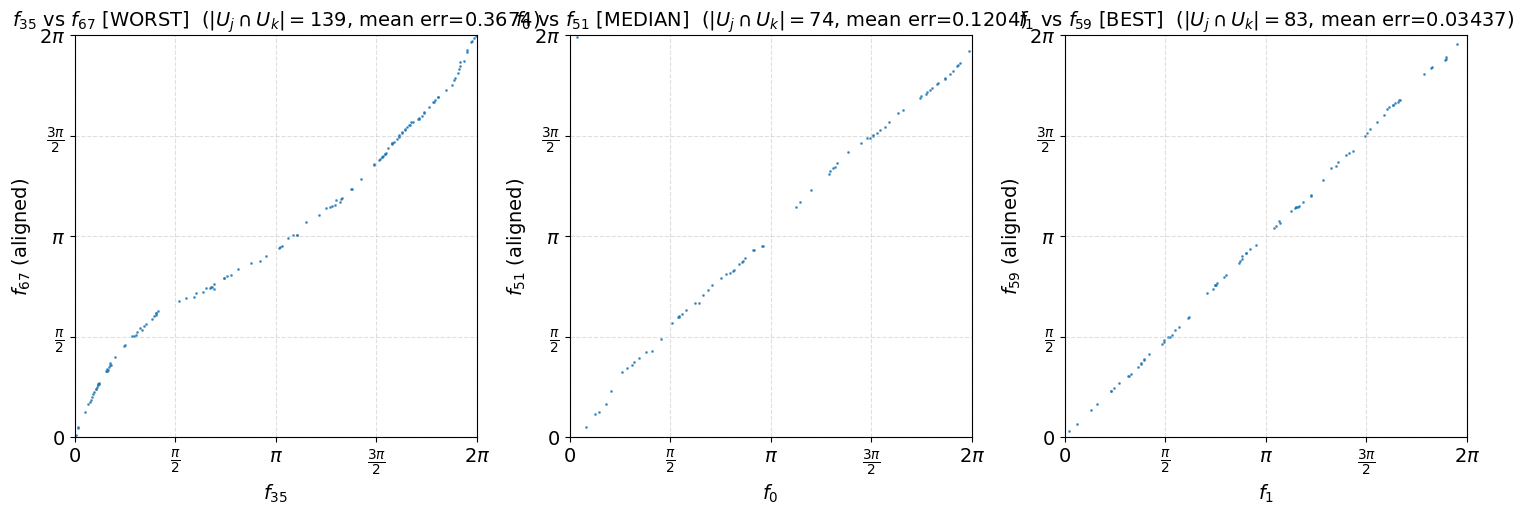

In [7]:
#Show some correlations of local circular coordinates

import matplotlib.pyplot as plt
cb.attach_bundle_viz_methods()

fig = bundle.compare_trivs(align = True, ncols = 3)
plt.show()

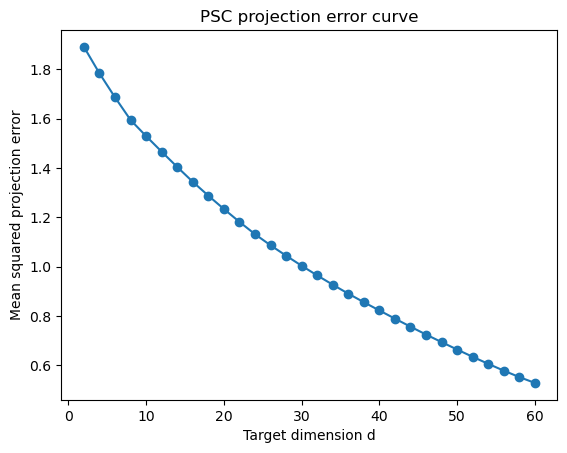

In [8]:
#Construct Stiefel frames
#and show mean squared error for PSC in different dimensions

tf = bundle.get_frame_dataset(
    reducer=None,
    max_frames = None,
    subcomplex = 'full')
Phi_true = tf.Y

#Choose dimensions to test
D = Phi_true.shape[1]
dims = list(range(2, min(D, 60) + 1, 2)) 

dims_arr, psc_err = cb.reduction_curve_psc(
    Phi_true=Phi_true,
    U=cover.U,
    dims=dims,
    max_frames=2000,     
    rng_seed=0,
    psc_verbosity=0,
    use_manopt=False,    
    plot = True,
)


In [ ]:
#Compute a bundle map compatible with a subcomplex of the nerve
reduced_dim = 4
reducer = cb.FrameReducerConfig(method="psc", d=reduced_dim, max_frames=1000)

bm = bundle.get_bundle_map(show_summary = True, reducer = reducer, subcomplex = 'full')
F = bm.F


# Lens Spaces $L(p,1) = \mathbb{S}^{3}/\mathbb{Z}_{p}$ As Circle Bundles Over $\mathbb{S}^{2}$

In [ ]:
from synthetic.s2_bundles import sample_sphere, hopf_projection
n_samples = 10000
data = sample_sphere(n = n_samples, dim = 3)
v = np.array([1, 0, 0]) 
base_points = hopf_projection(data=data, v= v)
print(base_points.shape)

In [ ]:
#Construct an open cover of RP2
n_sd = 2
cover = cb.make_s2_cover(base_points, n_sd = n_sd)

summ = cover.summarize(plot = True)

In [ ]:
#Compute local trivializations and characteristic classes using a quotient metric on S3
from circle_bundles.metrics import S3QuotientMetric
p = 3
v = np.array([1.0,0.0,0.0])
total_metric = S3QuotientMetric(p=p, v_axis = v, antipodal = False)  

bundle = cb.build_bundle(
    data,
    cover,
    CircularCoords_cls=CircularCoords,  
    landmarks_per_patch = 250,
    total_metric = total_metric,
    show=True,
)


In [ ]:
#Show some correlations of local circular coordinates
fig = bundle.compare_trivs(align = True, ncols = 3)
plt.show()

In [ ]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)



In [ ]:
#Show a visualization of the subcomplex of the nerve on which both class reps are trivial
fig = bundle.show_max_trivial()
plt.show()

# Quotients $\mathbb{S}^{3}/(\mathbb{Z}_{p}\rtimes\mathbb{Z}_{2})$ As Bundles Over $\mathbb{RP}^{2}$

In [ ]:
n_samples = 10000
data = sample_sphere(n = n_samples, dim = 3)
v = np.array([1, 0, 0]) 
base_points = hopf_projection(data=data, v= v)
print(base_points.shape)

In [ ]:
#Map base points to upper half sphere for visualization
#base_points[base_points[:,-1] < 0] = -1*base_points[base_points[:,-1] < 0]

#Construct an open cover of RP2
n_sd = 2
cover = cb.make_rp2_cover(base_points, n_sd = n_sd)

summ = cover.summarize(plot = True)

In [ ]:
#Compute local trivializations and characteristic classes using a quotient metric on S3
from circle_bundles.metrics import S3QuotientMetric
p = 2
v = np.array([1.0,0.0,0.0])

total_metric = S3QuotientMetric(p = p, v_axis = v, antipodal = True)

bundle = cb.build_bundle(
    data,
    cover,
    CircularCoords_cls=CircularCoords,  
    landmarks_per_patch = 250,
    total_metric = total_metric,
    show=True,
)


In [ ]:
#Construct Stiefel frames
#and show mean squared error for PSC in different dimensions

tf = bundle.get_frame_dataset(
    reducer=None,
    max_frames = None,
    stage = 'post_projection',
    subcomplex = 'full')
Phi_true = tf.Y


D = Phi_true.shape[1]
dims = list(range(2, min(D, 60) + 1, 2)) 

dims_arr, psc_err = cb.reduction_curve_psc(
    Phi_true=Phi_true,
    U=cover.U,
    dims=dims,
    max_frames=2000,     
    rng_seed=0,
    psc_verbosity=0,
    use_manopt=False,    
    plot = True,
)


In [ ]:
#Compute a bundle map compatible with a subcomplex of the nerve
reduced_dim = 4
reducer = cb.FrameReducerConfig(method="psc", d=reduced_dim, max_frames=1000)
reducer = None
subcomplex = 'full'    # Choices are 'full', 'cocycle', 'max_trivial'
bm = bundle.get_bundle_map(show_summary = True, reducer = reducer, subcomplex = subcomplex)
F = bm.F


In [ ]:
#Show an interactive visualization of the data
from circle_bundles.metrics import RP2UnitVectorMetric

app = cb.show_bundle_vis(base_points = base_points, 
                         data  = F, 
                         base_metric = RP2UnitVectorMetric(), 
                         colors = None)
plt.show()

In [ ]:
#Run Ripser on a sample of the data

from ripser import ripser
from persim import plot_diagrams


# Run Ripser
dgms_2 = ripser(F, coeff=2, maxdim=2, n_perm=500)["dgms"]
dgms_3 = ripser(F, coeff=3, maxdim=2, n_perm=500)["dgms"]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

plot_diagrams(dgms_2, ax=axes[0], title="coeff = 2")
plot_diagrams(dgms_3, ax=axes[1], title="coeff = 3")

plt.tight_layout()
plt.show()
